# SparklyRGT: rGT functions for data manipulation and visualization

**About:** The purpose of this Notebook is to demonstrate how to summarize, manipulate, and plot rGT data using the sparklyRGT package. It serves as a reference point for data analysis, and should not be edited. 

**Contact:**
* Dexter Kim: dexterkim2000@gmail.com
* Brett Hathaway: bretthathaway@psych.ubc.ca

**Requirements**
* Familiarity with Jupyter Notebook (https://www.youtube.com/watch?v=jZ952vChhuI)
* Please read the `readme.md` file before starting
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder
    * See [Section 4](#Changing-your-working-directory) if you want to have your data stored in a different folder

## Table of contents
* Section 1: [Loading data into Python](#1\)-Load-data-into-Python)
* Section 2: Baseline & Acquisition Analysis
    * 2A: [Data cleaning and processing](#2A\)-Baseline-&-Acquisition-Analysis)
    * 2B: [Plotting](#2B\)-Baseline-&-Acquisition-Analysis:-Plotting)
* Section 3: Latin Square Analysis and Plotting
    * 3A: [Data cleaning and processing](#3A\)-Latin-Square-Analysis)
    * 3B: [Plotting](#3B\)-Latin-Square-Analysis:-Plotting)
* Section 4: [Choice rGT](#4\)-Choice-rGT)
* Section 5: [Miscellaneous](#5\)-Miscellaneous)



**Please run the following cell before starting!**

In [1]:
#MEDPC rat gambling task functions imports, will print "I am being executed!" if functional
import sparklyRGT as rgt

#main imports 
import os
import pandas as pd
import numpy as np

# plotting imports 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# stats imports 
import scipy.stats as stats
import seaborn as sns
import pingouin as pg

#the following lines prevents pandas from giving unecessary errors and increases the number of rows you can view 
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


C:\Users\brett\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


***

# 1) Load data into Python

[back to top](#rGT-functions-for-data-manipulation-and-visualization)

* Write the names of the files that you want to load in as a list to `file_names`

`df = load_data(file_names, reset_sessions = False)` 
* creates a table similar to the excel sheet(s) you loaded in. (in the order established in `file_names`) 
* `df` stands for dataframe, and will store the data you load in as a table
* passing `reset_sessions = True`:
    * makes the session numbers start from 1 again (you may want to do this for baseline analysis or if you're loading in multiple projects)
* note: changes `'Session'` and `'Subject'` from float to int, and removes completely blank rows
    
`df = load_multiple_data(file_names, reset_sessions = False)` 
* loads in multiple cohorts (with the same subject numbers) and assigns them unique subject numbers (ex. subject 1 of cohort 1 --> subject 101) 



In [2]:
file_names = ['BH07_raw_free_S29-30.xlsx'] 

df = rgt.load_data(file_names)

#load_data won't print the dataframe. Use the following function to view the top of your dataframe. 
#Note: it should look the exact same as your first excel file. 

df.head()

,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,1.0,...,3,3,30,0,0,0,0,0,0,0
1,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,2.1,...,0,0,0,1,5,0,0,0,0,0
2,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,2.0,...,3,2,30,0,0,0,0,0,0,0
3,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,3.0,...,0,0,0,0,0,0,0,0,0,0
4,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,4.0,...,2,2,30,0,0,0,0,0,0,0


***
# 2A) Baseline & Acquisition Analysis

[back to top](#rGT-functions-for-data-manipulation-and-visualization)

Set your objects! These will be used in the rest of section 2A and 2B. Examples are left in for clarity.
* Assign the rat subject numbers for each group to `exp_group` and `control_group`
    * you can add additional groups - just ensure you also add them to the group_list and group_names
* Assign the names of your groups to `group_names`
    * as a dictionary
* Put your groups together into a list
    * **must** be in the same order as they are in group_names 
* For plotting:
    * Assign the title of the project to `title`
    * Assign the range of sessions you want to include in figures to `startsess` and `endsess`


In [8]:
control_group = [3, 4, 5, 6, 9, 13, 14, 15, 17, 18, 23, 24, 27, 28, 30, 31] #In this example: Tg negative rats

exp_group = [1, 2, 7, 8, 11, 12, 16, 19, 20, 21, 22, 25, 26, 29, 32] #In this example: Tg positive rats

group_names = {0: 'Tg negative',
              1: 'Tg positive'} 

group_list = [control_group, exp_group]

#for plotting: 
title = 'Nigrostriatal activation during acquisition' 

startsess = 29 #first session you would like to include in figures
endsess = 30 #last session you would like to include in figures

## Data cleaning

### Check your session data
* `check_sessions` gives us a summary for each rat including session numbers, session dates and # of trials for each session.
* This allows us to see if there are any missing/incorrect session numbers, and if MED-PC exported all of the desired data into the Excel file you loaded in (`file_names`).  

In [3]:
rgt.check_sessions(df)

Subject  StartDate   Session
1        2020-10-09  29         131.1
         2020-10-10  30         124.0
2        2020-10-09  29          76.1
         2020-10-10  30          81.0
3        2020-10-09  29          49.0
         2020-10-10  30          45.0
4        2020-10-09  29         103.0
         2020-10-10  30          97.0
5        2020-10-09  29          68.1
         2020-10-10  30          69.0
6        2020-10-09  29          88.0
         2020-10-10  30          75.0
7        2020-10-09  28          53.0
         2020-10-10  29          65.0
         2020-10-13  30          56.1
8        2020-10-09  29         124.0
         2020-10-10  30         121.0
9        2020-10-09  29          62.0
         2020-10-10  30          61.0
11       2020-10-09  29         132.0
         2020-10-10  30         136.1
12       2020-10-09  29          54.0
         2020-10-10  30          72.0
13       2020-10-09  29          67.0
         2020-10-10  30          60.0
14       2020-10-09  

### Dropping & editing session numbers
* `rgt.drop_sessions(df, [session numbers])`
    * pass the df you loaded in and the session number(s) you'd like to remove (as a list)
    * For example, to remove all data from session 28 and 29, I would write: `rgt.drop_sessions(df, [28, 29])`
    * Requirement: session number must exist in the session column of df
    
    
* `rgt.edit_sessions(df, orig_sess = [list], new_sess = [list], subs = 'all')`
    * write the original session numbers you want to remove in `orig_sess`, and the numbers you want to replace them with in `new_sess`, in the correct order 
    * For example, to change **all** 30s to 29s, and 31s to 30s, I would write: `rgt.edit_sessions(df2, orig_sess = [30, 31], new_sess = [29, 30], subs = "all")`
    * If you want to make edits, **for certain subjects**, I would assign the subject numbers to  `subs`. For example, I would write `subs = [17, 21]`
    

* **in both cases:** assign to a new object (i.e., `df2`), or if you are sure you want to make these edits, you can save over the original df (assign to `df`)


In [4]:
df2 = rgt.drop_sessions(df, [28])

#example for edit_sessions: 
#df2 = rgt.edit_sessions(df2, orig_sess = [30, 31], new_sess = [29, 30], subs = "all")

#### Check that you dropped/edited the desired session(s)

In [ ]:
rgt.check_sessions(df2) 

## Data processing

### Calculate variables for each rat

`df_sum = rgt.get_summary_data(df, mode = 'Session')`

In df_sum, the rows represent subjects (rats 1 to n)

The columns are explained below:
* `##P#` represents the percent choice of each option. For example, `29P1` represents the percentage of times P1 was selected during the 29th session. 
* `risk##` represents the risk score for each session: (P1 + P2) - (P3 + P4) 
* `collect_lat##` represents the mean collect latency for each session
* `choice_lat##` represents the mean choice latency for each session 
* `omit##` represents the number of omissions for each session
* `trial##` represents the number of trials completed for each session
* `prem##` represents the percentage of premature responses for each session

In [6]:
df_sum = rgt.get_summary_data(df2) #change to df instead of df2 if you didn't do any session editing
df_sum #prints the dataset 

,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,collect_lat29,collect_lat30,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30
1,90.8397,0,8.39695,0.763359,83.0645,0,16.9355,0,81.6794,66.129,1.077168,1.286471,0.638321,0.655323,0,0,131.1,124.0,26.404494,24.848485
2,9.33333,65.3333,10.6667,14.6667,4.93827,76.5432,0,18.5185,49.3333,62.963,1.607407,1.387458,1.057733,1.249012,1,0,76.1,81.0,30.275229,33.606557
3,2.17391,8.69565,56.5217,32.6087,0,11.6279,67.4419,20.9302,-78.2609,-76.7442,1.023333,1.026522,2.833261,3.652791,3,2,49.0,45.0,3.921569,6.250000
4,5.88235,73.5294,4.90196,15.6863,13.4021,64.9485,3.09278,18.5567,58.8235,56.701,1.263699,1.133429,1.000980,0.885258,1,0,103.0,97.0,13.445378,24.218750
5,0,1.53846,98.4615,0,9.375,7.8125,79.6875,3.125,-96.9231,-65.625,0.807188,1.098889,3.135846,3.176250,3,5,68.1,69.0,8.108108,16.867470
6,2.5,70,0,27.5,2.94118,63.2353,0,33.8235,45,32.3529,1.055714,1.061136,2.172000,1.859265,8,7,88.0,75.0,9.278351,15.730337
7,3.07692,10.7692,64.6154,21.5385,1.81818,10.9091,69.0909,18.1818,-72.3077,-74.5455,0.839412,0.929643,1.012615,1.194545,0,0,65.0,56.1,16.666667,34.523810
8,2.41935,92.7419,0.806452,4.03226,2.47934,94.2149,1.65289,1.65289,90.3226,93.3884,1.791649,1.724421,1.850484,1.956033,0,0,124.0,121.0,10.144928,12.949640
9,3.27869,3.27869,90.1639,3.27869,5.26316,7.01754,82.4561,5.26316,-86.8852,-75.4386,0.748000,0.711429,2.300328,2.754211,1,4,62.0,61.0,20.512821,11.594203
11,10.687,88.5496,0.763359,0,8.14815,91.1111,0,0.740741,98.4733,98.5185,1.406731,1.543853,1.950153,1.667852,1,0,132.0,136.1,2.222222,7.534247


### Get long-form summary data
`get_long_summary_data(df_edited, df_sum, task = None)`
- Takes in the edited df (after dropping subjects and sessions) and wide-summary df, and outputs a long-summary df
- Cannot take subjects with different session numbers

In [ ]:
df_long = rgt.get_long_summary_data(df, df_sum)
df_long.head()

### Get risk status of the rats for long-form summary data
`get_risk_status_long(df_long_sum, sessions = None)`
- takes in long df summary data and list of sessions, and gets the mean risks and risk status and appends it to df_long
- if sessions is not passed, all sessions in df_long are used

In [ ]:
df_long = rgt.get_risk_status_long(df_long)

### Get group data for long-form summary data
`get_group_long(df_long, group_list)`
- takes in df_long and group_list, and creates a column called group. Group == 1 represents the first group passed to group_list, and so on, up to 4 groups

In [ ]:
df_long = rgt.get_group_long(df_long, group_list)

### Missing data

Check out the `impute_missing_data()` function in the [Miscellaneous section](#Impute-missing-data-by-taking-the-mean)


### Get the risk status of the rats

`df_sum, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)`


This code adds two columns to your df: `mean_risk` and `risk_status`


* `risk_status == 1` indicates a positive risk score (optimal) 
* `risk_status == 2` indicates a negative risk score (risky)
* `mean_risk` is the mean risk score averaged across the sessions between `startsess` and `endsess` for a given subject
    * You can change `startsess` and `endsess` by passing the session numbers instead. For example, `rgt.get_risk_status(df_sum, 28, 30)`
    * Requirement: `startsess` and `endsess` must be in the df
* `print(risky, optimal)` prints out 2 lists of rat subjects: the risky rats, and the optimal rats 

In [9]:
df_sum, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

print(df_sum[['mean_risk','risk_status']]) 
print(risky, optimal) 

    mean_risk  risk_status
1   73.904211          1.0
2   56.148148          1.0
3  -77.502528          2.0
4   57.762280          1.0
5  -81.274038          2.0
6   38.676471          1.0
7  -73.426573          2.0
8   91.855505          1.0
9  -81.161921          2.0
11  98.495900          1.0
12  32.942097          1.0
13 -33.705357          2.0
14  43.214286          1.0
15 -41.344124          2.0
16 -30.296896          2.0
17   0.633446          1.0
18  41.629689          1.0
19   4.054054          1.0
20  91.116505          1.0
21  11.868687          1.0
22  62.978469          1.0
23  75.345912          1.0
24  71.178218          1.0
25 -98.437500          2.0
26  35.270270          1.0
27  44.732745          1.0
28  43.102453          1.0
29 -30.433996          2.0
30  94.573643          1.0
31  80.796731          1.0
32   1.587302          1.0
[3, 5, 7, 9, 13, 15, 16, 25, 29] [1, 2, 4, 6, 8, 11, 12, 14, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32]


### Export your data to an Excel file 

`export_to_excel(df, groups = None, column_name = 'group', new_file_name = 'summary_data', asin = False)`

* `groups`(optional): pass the group_list defined at the beginning of this Notebook to add a column that specifies which experimental group each rat is in
    * numbers will be assigned according to their order in group_list (in this example: `Tg negative rats == 0`, `Tg positive rat == 1`)
* `column_name`: Assign a name to the column in the exported Excel file that will specify the control vs. experimental group. In this example: `tg_status`
* `new_file_name`: Assign the name of the **new** Excel file that you're exporting
* `asin`: False by default; passing `asin = True` will perform an arcsine transformation on percentage variables: P1-P4 and premature responding
    * can then be imported into SPSS for analysis

In [ ]:
rgt.export_to_excel(df_sum, groups = group_list, column_name = 'tg_status', new_file_name = 'BH07_free_S29-30.xlsx', asin = True)

## Run Anova on selected variables

`rm_anova(df_long_sum, variables = None, sessions = None, task = None)`
- Takes in long-summary data (df), outcome variables (list), sessions (list) and task... then runs a RM ANOVA on those variables across those sessions.
- If nothing is passed to variables or sessions, the RM ANOVA will be run on all variables and sessions in df_long_sum
- Must pass at least 2 session numbers to sessions
- The function will print the unstable df, and stable df

In [ ]:
rgt.rm_anova(df_long)

`mixed_anova(df_long_sum, bsf, variables = None, sessions = None, show_df = None, task = None)`
- Takes in long-summary data with between-subjects factors of interest (ex. risk_status, group) as separate columns (dataframe), 1 between-subjects factor (string), outcome variables (list), sessions (list), specific variables (list) and task...and runs a mixed ANOVA on those variables across those sessions.
- If nothing is passed to variables or sessions, the RM ANOVA will be run on all variables and sessions in df_long_sum
- Must pass at least 2 session numbers to sessions
- The function will output a list of unstable variable(s) and stable variables, and dfs for the variables specified in show_df

In [ ]:
rgt.mixed_anova(df_long, "group", show_df = ['collect_lat', 'P1'])

## Calculate means and SEMs for your experimental groups

`mean_scores, SEM = rgt.get_means_sem(df_sum, groups = None, group_names = None)`

* `df_sum`: the summary dataframe you created above, with the variables calculated per rat
    * if one of your "groups" contains a subject number that doesn't exist in df_sum, a KeyError will occur
* `groups`: the list of groups created at the start of this section (`group_list`)
* `group_names`: the dictionary of group names created at the start of this section (`group_names`)

Output:
* `mean_scores`: each value is the mean for that variable (ex. `29P1`) for each experimental group (in this example: `tg negative` and `tg positive`) 
* `SEM`: each value is the standard error of the mean for that variable for each experimental group
* If you want to view certain columns, specify them as a list in square brackets following `mean_scores` or `SEM`
    * For example, `mean_scores[['risk29', 'risk30']]` will display a table with only those 2 columns


These can also be exported to an excel file, using `mean_scores.to_excel('file name.xlsx')` or `SEM.to_excel('file name.xlsx')`
* check out [this link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html) for more details


In [10]:
mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)
mean_scores #view all mean scores (truncated)
# mean_scores[['risk29', 'risk30']] #view certain columns

,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,...,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30,mean_risk,risk_status
Tg negative,5.74901,50.9906,33.8409,9.41941,7.24256,53.3089,28.8852,10.5634,13.4793,21.1029,...,2.10245,2.07925,3.25,3.5,77.4563,83.0812,14.055,13.637,17.2911,1.3125
Tg positive,16.0466,45.0598,21.712,17.1815,14.8991,45.8362,22.0626,17.2021,22.2129,21.4706,...,1.77515,1.82612,1.53333,2.73333,86.56,85.0267,18.3601,20.5969,21.8417,1.26667


### Calculate means and SEMS for your experimental groups, split by risk status and/or sex

* Can use a technique called list comprehension to create lists of experimental risky rats, experimental optimal rats, etc.
    * example given below
    
    
* Alternatively, you can just manually type in the lists: 
    * e.g., `control_risky` = [1,2,3]
    
    
* You can adapt this code to split by sex, or further split risk groups by sex:
    * First, create a list of female and male subjects: `female = [1,2,3]`; `male = [4,5,6]`
    * `control_female = [subject for subject in control_group if subject in female]`
    * `control_risky_female = [subject for subject in control_risky if subject in female]`


* You can create as many groups as you like, just make sure you add them to `group_list_risk` and `group_names_risk`!

In [11]:
control_risky = [subject for subject in control_group if subject in risky]
exp_risky = [subject for subject in exp_group if subject in risky]

control_optimal = [subject for subject in control_group if subject in optimal]
exp_optimal = [subject for subject in exp_group if subject in optimal]


group_list_risk = [control_risky,exp_risky, control_optimal, exp_optimal]

#make sure the group names are in the same order as the group list!
group_names_risk = {0:'Control risky', 
                    1: 'Experimental risky',
                    2: 'Control optimal',
                    3: 'Experimental optimal'}

mean_scores_risk, SEM_risk = rgt.get_means_sem(df_sum, group_list_risk, group_names_risk)

mean_scores_risk

,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,...,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30,mean_risk,risk_status
Control risky,3.06118,12.4092,75.0945,9.43513,4.68872,16.8433,69.0698,9.39816,-69.0592,-56.9359,...,2.5709,2.75038,3,3.4,60.02,59.02,11.9097,13.8373,-62.9976,2
Experimental risky,10.9236,10.4871,57.0766,21.5128,6.82045,13.6201,56.6761,22.8834,-57.1786,-59.1188,...,1.59679,1.80653,0,2.25,66.75,63.05,17.0782,22.7373,-58.1487,2
Control optimal,6.97075,68.5277,15.0893,9.41227,8.40341,69.8842,10.6194,11.093,50.9968,56.5752,...,1.88951,1.77419,3.36364,3.54545,85.3818,94.0182,15.0301,13.546,53.786,1
Experimental optimal,17.9095,57.6318,8.85216,15.6065,17.8368,57.5511,9.47589,15.1362,51.0826,50.7758,...,1.84001,1.83325,2.09091,2.90909,93.7636,93.0182,18.8262,19.8185,50.9292,1


# 2B) Baseline & Acquisition Analysis: Plotting

[back to top](#rGT-functions-for-data-manipulation-and-visualization)

**For all plotting functions**: If you are missing data for a particular rat, error bars will not appear on the figures

## Bar plot of P1-P4 % choice

`rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM)`

* This function plots the mean P1-P4 choices for the experimental groups 
    * You can change startsess and endsess to calculate the mean over whichever sessions you like

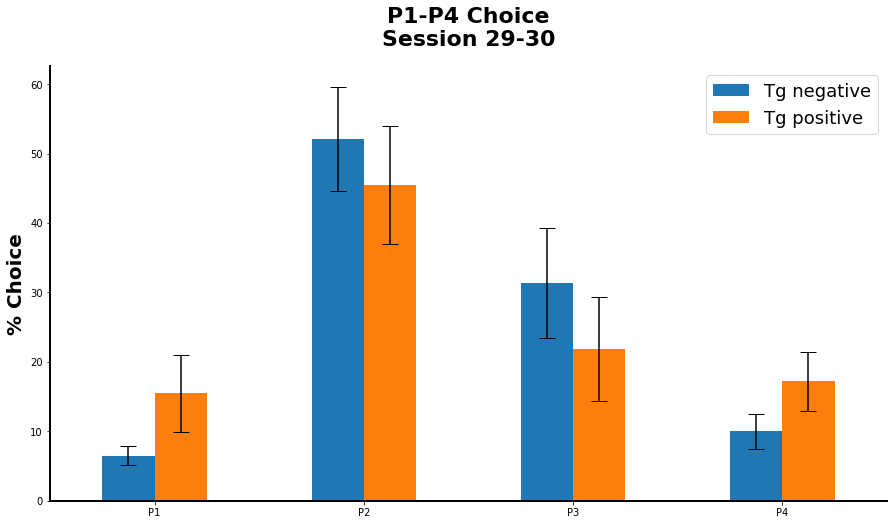

In [12]:
rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM)

#to save this figure (or any other figure):
#plt.savefig('BH07 Choice S29-30',facecolor = 'white')

## Line plot of other variables

`rgt.rgt_plot('variable', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'variable name', highlight = None)`
* `variable`: specifies the variable you want to plot. 
    * For example, if I want to plot `choice_lat`, I would replace `variable` with `'choice_lat'` (just the variable name, don't include session numbers)
* `startsess` and `endsess`: specifies the range of session numbers you'd like to plot 
    * For example, if I want to plot `choice_lat` over sessions 29 to 31, I would replace `startsess` and `endsess` with `29` and `31` respectively
    * Requirement: `startsess` and `endsess` must be in the df
* `group_names`: pass a dictionary with the `mean_scores` index for each group as the keys and the names of groups as the values (defined at beginning of this Notebook)
* `y_label`: specifies the Y axis label
* `highlight`: specify a session number - a line will be added at that session and the figure will be shaded gray to the right of the line
    * useful if you take your rats off of a drug or otherwise change your experimental manipulation, and want to represent that on the figure

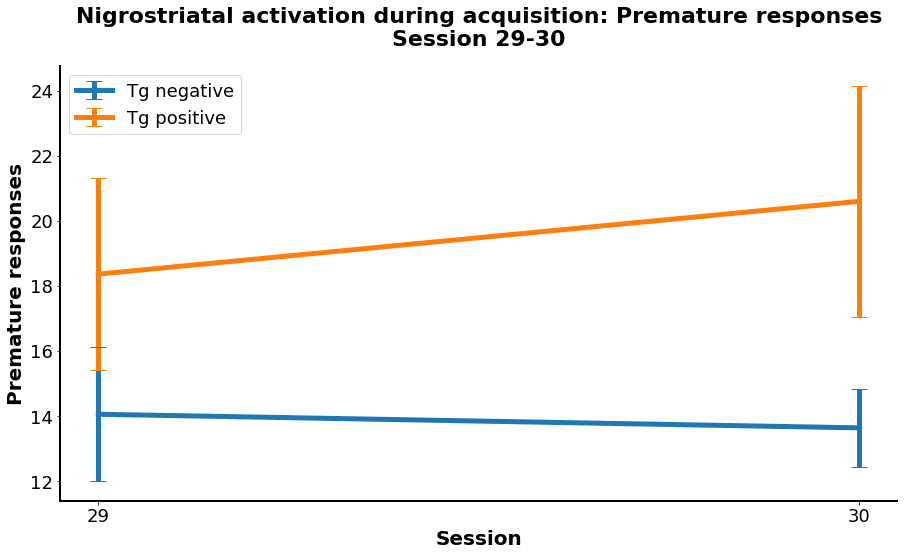

In [15]:
rgt.rgt_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Premature responses') 

## Bar plot of other variables

`rgt.rgt_bar_plot('variable', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Variable name')`

* takes the mean of specified `variable` over session range specified by `startsess` and `endsess`
* plots as bar plot for each group specified in `group_names` dictionary
* `y_label`: Y axis label

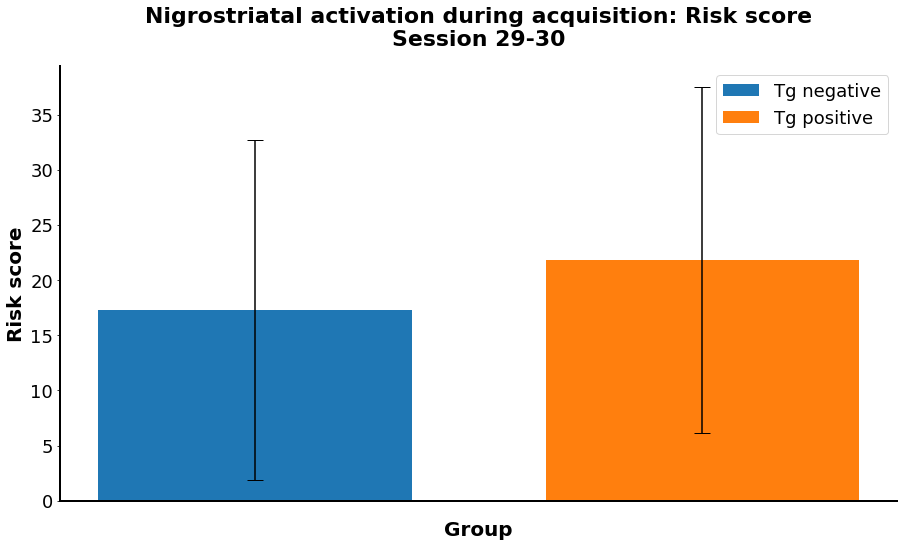

In [14]:
rgt.rgt_bar_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score')

## Plotting by risk status

### Bar plot of P1-P4 % Choice

* Use the functions above but pass `group_names_risk`, `mean_scores_risk` and `SEM_risk` instead

In [ ]:
rgt.choice_bar_plot(startsess, endsess, mean_scores_risk, SEM_risk)

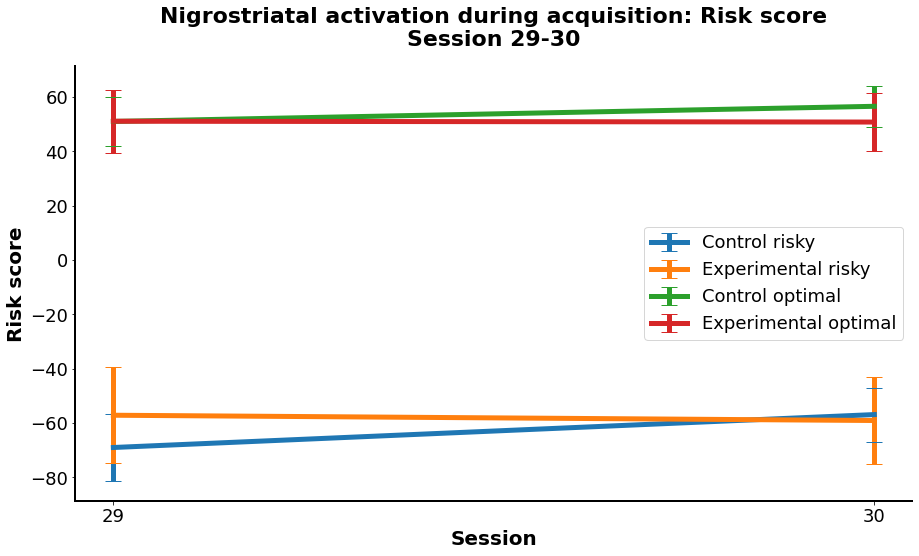

In [16]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores_risk, SEM_risk, group_names = group_names_risk, y_label = 'Risk score') 

In [ ]:
rgt.rgt_bar_plot('prem', startsess, endsess, title, mean_scores_risk, SEM_risk, group_names = group_names_risk,y_label = 'Premature responding')

***
# 3A) Latin Square Analysis

[back to top](#rGT-functions-for-data-manipulation-and-visualization)

**This section assumes you have assigned dosing information to the 'Group' variable in MEDPC**
* in this example: vehicle = 1 in Group column, low dose = 2, mid dose = 3, high dose = 4

Set your objects! These will be used in the rest of section 3A and 3B. Examples are left in for clarity.
* Assign the names of the files that you want to analyze to `file_names`
* Assign a title, for plotting
* Assign the startdose and enddose variables - 1 and 4 in this example 

**Note:** This section assumes all of your rats received the same manipulation; if you have multiple experimental groups (e.g., different brain regions, Tg+/Tg-) in your dataset, see [Miscellaneous section](#Example:-between-subjects-analysis-for-Latin-Square-dataset) for an example of how to do so

In [ ]:
file_names = ['BH06_raw_round1-infusions.xlsx', 'BH06_raw_round1-makeup.xlsx'] 

df = rgt.load_data(file_names)

#for plotting: 
title = '5-HT2c Antagonist' 

#lowest group number
startdose =  1
#highest group number
enddose = 4

## Data cleaning

### Check the Group numbers for each rat

`rgt.check_groups(df)`
* This function will show you the Group numbers and trials completed for each rat

In [ ]:
rgt.check_groups(df)

### Drop subjects & edit Group numbers

`df2 = rgt.edit_groups(df, orig_group = [list], new_group = [list], subs = 'all')`

* `orig_group`: enter the group number(s) that you want to change in square brackets 
* `new_group`: enter the new group number(s) you want to change to 
    * pay attention to order: first group number in `orig_group` will be changed to first group number in `new_group`, and so on for additional numbers    
* `subs`: by default this equals 'all' (changes will be made for all subjects)
    * pass a list of subject numbers if you only want to change the group numbers for certain subjects

`df2 = rgt.drop_subjects(df, subs = [list])`

* `subs`: enter a list of subjects that you want to remove the data for

**in both cases:** assign to a new object (i.e., `df2`), or if you are sure you want to make these edits, you can save over the original df (assign to `df`)


In [ ]:
df2 = rgt.edit_groups(df, orig_group = [0], new_group = [3], subs = [5])

df2 = rgt.drop_subjects(df, subs = [7])

### Check that you edited the Group number/dropped subjects as desired

In [ ]:
rgt.check_groups(df2)

## Data processing

### Calculate variables for each rat at each dose

`df_sum = rgt.get_summary_data(df, mode = 'Group')`
* **for Latin Square data, make sure you pass `mode = 'Group'` to this function (will calculate by Session by default)**

The rows represent subjects (rats 1 to n)

The columns are explained below:
* `##P#` represents the percent choice of each option. For example `1P1` represents the percent choice of P1 at dose 1
* `risk##` represents the risk score for each dose: (P1 + P2) - (P3 + P4) 
* `collect_lat##` represents the mean collect latency for each dose
* `choice_lat##` represents the mean choice latency for each dose
* `omit##` represents the number of omissions for each dose
* `trial##` represents the number of trials completed for each dose
* `prem##` represents the number of premature responses for each dose

In [ ]:
df_sum = rgt.get_summary_data(df2, mode = 'Group')
df_sum

### Impute missing data
`rgt.impute_missing_data(df, session = None, subject = None, choice = 'all', vars = 'all')`

* This function is described in the [Miscellaneous section](#Impute-missing-data-by-taking-the-mean)


In [ ]:
df_sum = rgt.impute_missing_data(df_sum, session = 2, subject = 12, choice = 'all', vars = 'all')

### Get risk status based on vehicle dose data

`df_sum,risky,optimal = rgt.get_risk_status_vehicle(df_sum)`

This function adds a column to your df: `risk_status`, calculated from the Vehicle dose data

* Note: 
    * `risk_status == 1` indicates a positive risk score (optimal) 
    * `risk_status == 2` indicates a negative risk score (risky)
    * `print(risky, optimal)` prints out 2 lists of rat subjects: the risky rats, and the optimal rats 


In [ ]:
df_sum,risky,optimal = rgt.get_risk_status_vehicle(df_sum)
print(risky, optimal)

### Export your data to an Excel file!

`export_to_excel(df, groups = None, column_name = 'group', new_file_name = 'summary_data', asin = False)`

* In this example: only one experimental condition, so optional groups and column_name arguments are not included
* `new_file_name`: Assign the name of the **new** Excel file that you're exporting
* `asin`: False by default; passing `asin = True` will perform an arcsine transformation on percentage variables: P1-P4 and premature responding
    * can then be imported into SPSS for analysis 

In [ ]:
rgt.export_to_excel(df_sum, new_file_name = 'BH06_all-data.xlsx', asin = True)

## Calculate means and SEMs for each dose

`mean_scores, SEM = rgt.get_means_sem(df_sum, groups = None, group_names = None)`

* `df_sum`: the summary dataframe you created above, with the variables calculated per rat
* `groups`: None by default, so doesn't need to be included 
* `group_names`: None by default, so doesn't need to be included
    * if not included, group name will be automatically assigned as 'All rats'

Output:
* `mean_scores`: each value is the mean for that variable (ex. `29P1`) for all rats 
* `SEM`: each value is the standard error of the mean for that variable for all rats
* If you want to view certain columns, specify them as a list in square brackets following `mean_scores` or `SEM`
    * For example, `mean_scores[['risk1', 'risk2']]` will display a table with only those 2 columns


These can also be exported to an excel file, using `mean_scores.to_excel('file name.xlsx')` or `SEM.to_excel('file name.xlsx')`
* check out [this link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html) for more details

In [ ]:
mean_scores, SEM = rgt.get_means_sem(df_sum)
mean_scores
# mean_scores[['omit3', 'omit4']]

### Calculating means and SEMS separately for risky and optimal rats

* you can pass risky and optimal lists, along with the group names, to the `get_means_sem` function to calculate mean/SEM values separately

In [ ]:
groups_risk = [risky,optimal]
group_names_risk = {0: 'Risky',
                    1: 'Optimal'}

means_risk, SEM_risk = rgt.get_means_sem(df_sum, groups = groups_risk, group_names = group_names_risk)

means_risk

# 3B) Latin Square Analysis: Plotting

[back to top](#rGT-functions-for-data-manipulation-and-visualization)

**For all plotting functions**: If you are missing data for a particular rat, error bars will not appear on the figures

## Bar plot for P1-P4 % Choice

`rgt.ls_bar_plot('group name',mean_scores,SEM)`

* `'group name'`: replace with the group name that you would like to plot
    * assigned as 'All rats' if group names are not passed to the function `rgt.get_means_SEM`

In [ ]:
rgt.ls_bar_plot('All rats',mean_scores,SEM)

## Line plot of other variables

`rgt.rgt_plot('variable', startsess, endsess, title, mean_scores, SEM, y_label = 'variable', x_label = 'Session')`
* `variable`: specifies the variable you want to plot. 
    * For example, if I want to plot `choice_lat`, I would replace `variable` with `'choice_lat'` (just the variable name, don't include session numbers)
* `startsess` and `endsess`: specifies the range of session numbers you'd like to plot 
    * **For Latin Square analysis**: We will pass the start and end Dose numbers (assigned to Group in MEDPC) - 1 and 4 in this example (startdose and enddose defined at beginning of this section)
* `y_label`: specifies the Y axis label
* `x_label`: specifies the X axis label; 'Session' by default, but here we want it to be 'Dose'


In [ ]:
rgt.rgt_plot('risk',startdose,enddose,title,mean_scores,SEM,y_label = 'Risk score', x_label = 'Dose')

## Plotting by risk status

for `rgt.ls_bar_plot('group', means, SEM)`:
* pass 'Risky' or 'Optimal' as the first argument, instead of 'All rats'
* use `means_risk` and `SEM_risk` instead

In [ ]:
rgt.ls_bar_plot('Risky',means_risk,SEM_risk)
rgt.ls_bar_plot('Optimal',means_risk,SEM_risk)

### Line plots for other variables by risk status

`rgt.rgt_plot('variable',startdose,enddose,title,means,SEM,group_names = None, y_label = 'variable', x_label = 'Dose')`

* pass an additional argument to `rgt.rgt_plot`: group_names = group_names_risk
* use means_risk and SEM_risk instead 
* assign `x_label` as 'Dose' (`x_label = 'Session'` by default)


In [ ]:
rgt.rgt_plot('risk',startdose,enddose,title,means_risk,SEM_risk,group_names = group_names_risk, y_label = 'Risk score', x_label = 'Dose')

***
# 4) Choice rGT

[back to top](#SparklyRGT:-rGT-functions-for-data-manipulation-and-visualization)

Set your objects! These will be used in the rest of section 4. Examples are left in for clarity.
* Assign the rat subject numbers for each group to `males` and `females`
    * you can add additional groups - just ensure you also add them to the group_list and group_names
* Assign the names of your groups to `group_names`
    * as a dictionary
* Put your groups together into a list
    * **must** be in the same order as they are in group_names 
* For plotting:
    * Assign the title of the project to `title`
    * Assign the range of sessions you want to include in figures to `startsess` and `endsess`


In [ ]:
males = list(range(1,33))

females = []

group_names = {0: 'males',
              1: 'females'} 

group_list = [males,females]

#for plotting: 
title = 'Choice rGT' 

startsess = 1 #first session you would like to include in figures
endsess = 15 #last session you would like to include in figures



**Note:** A detailed description of the following functions can be found in section 2A

In [ ]:
# rgt.check_sessions(df)
# df2 = rgt.drop_sessions(df, [28])
# df2 = rgt.edit_sessions(df2, orig_sess = [30, 31], new_sess = [29, 30], subs = "all") 

## Data processing

### Calculate variables for each rat

`df_sum = rgt.get_summary_data(df, mode = 'Session', task = 'choiceRGT)`

In df_sum, the rows represent subjects (rats 1 to n)

The columns are explained below:
* `#P#_(C/U)` represents the percent choice of each option in the cued/uncued task. For example, `2P1_U` represents the percentage of times P1 was selected during uncued trials in the 2nd session. 
* `risk_(un)cued#` represents the risk score for each session: (P1 + P2) - (P3 + P4) 
* `co_lat_(un)cued#` represents the mean collect latency for each session ***not alternating 
* `ch_lat_(un)cued#` represents the mean choice latency for each session ***not alternating
* `(un)cued_lev_lat#` represents the mean lever latency for each session
* `(un)cued_omit#` represents the number of choice omissions for each session
* `lev_omit#` represents the number of lever omissions for each session
* `trial_init#` represents the number of trials completed for each session
* `prem_(un)cued#` represents the percentage of premature responses for each session
* `pref#` represents the percentage of choosing cuedRGT over uncuedRGT [cued / (cued + uncued)] for each session

If you are getting a ValueError, try running the following lines before `rgt.get_summary_data`. The ValueError is most likely due to empty rows in your trial-by-trial data which can be hard to identify (due to thousands of rows).

`df.dropna(how = 'all', inplace = True)
df.reset_index(drop=True, inplace = True)
df['Session'] = df['Session'].astype(int)
df['Subject'] = df['Subject'].astype(int)`

In [ ]:
# df.dropna(how = 'all', inplace = True)
# df.reset_index(drop=True, inplace = True)
# df['Session'] = df['Session'].astype(int)
# df['Subject'] = df['Subject'].astype(int)

In [ ]:
df_sum = rgt.get_summary_data(df, task = 'choiceRGT')
df_sum

### Export your data to an Excel file 

`export_to_excel(df, groups = None, column_name = 'group', new_file_name = 'summary_data', asin = False)`

* `groups`(optional): pass the group_list defined at the beginning of this Notebook to add a column that specifies which experimental group each rat is in
    * numbers will be assigned according to their order in group_list (in this example: `Tg negative rats == 0`, `Tg positive rat == 1`)
* `column_name`: Assign a name to the column in the exported Excel file that will specify the control vs. experimental group. In this example: `tg_status`
* `new_file_name`: Assign the name of the **new** Excel file that you're exporting
* `asin`: False by default; passing `asin = True` will perform an arcsine transformation on percentage variables: P1-P4 and premature responding
    * can then be imported into SPSS for analysis

In [ ]:
rgt.export_to_excel(df_sum, groups = group_list, column_name = 'gender', new_file_name = 'trials_edited.xlsx', asin = False)

## Run Anova on selected variables
Refer to section 2A for detailed description of this function

In [ ]:
rgt.rm_anova(df_long, task = 'choiceRGT')

In [ ]:
rgt.mixed_anova(df_long, "group", show_df = ['collect_lat', 'P1'])

***
# 5) Miscellaneous

[back to top](#rGT-functions-for-data-manipulation-and-visualization)

## Changing your working directory

* Check your current working directory by running `os.getcwd()` 
    * by default, this will be wherever the jupyter notebook file is saved
* After loading in rgt_functions.py, you may want to move to the folder where your data is saved
* Change your working directory using `os.chdir('C:\\...)`
    * can be absolute or relative file path
* For example, my current working directory is `'C:\\Users\\dexte\\hathaway_1'`, I can change this by running `os.chdir('C:\\Users\\dexte\\hathaway_1\\data')` 
    * slashes will be different if you are not using Windows
* Data files can now be loaded in from and saved to the folder you moved to

In [ ]:
#checks current working directory
os.getcwd()

#changes working directory to whatever is included in brackets
os.chdir('C:\\Users\\dexte\\hathaway_1\\data') 

## Impute missing data by taking the mean

`rgt.impute_missing_data(df, session = None, subject = None, choice = 'all', vars = 'all')`

* this function takes the mean of the session before and after the missing data, for the specified session and subject
    * You can also specify a Group number in the session variable for Latin Square analysis
* For example, if you have missing data for subject 12, dose 2, this function will calculate the mean of dose 1 and 3
    * Code: `df = rgt.impute_missing_data(df, session = 2, subject = 12, choice = 'all', vars = 'all')`
* You can specify which P1-P4 options you'd like to impute by passing a list to `choice`
    * `choice = [1,3]`
* You can specify which variables by passing the variable names as a list to `vars`
    * `vars = ['prem', 'choice_lat']`

## Making changes to the rgt_functions.py file

* If you make changes in the .py file, run the following cell
* Every time you change & save the .py file, the changes will automatically be loaded into the Notebook!

In [ ]:
%load_ext autoreload
%autoreload 2

## Example: between-subjects analysis for Latin Square dataset

* This example combines information from Section 2 and Section 3
* See Section 2 for guidance on how to export to excel, further split by risky/optimal, etc while taking experimental group information into account

### Define objects

This is similar to defining experimental groups in 2A:
* `group_names`: create a dictionary for your group names (here, I'm specifying different brain regions, but you could also specify any number of different experimental groups, e.g., Tg positive and Tg negative, as done in 2A) 
* `group_list`: create lists of subject numbers for your different groups, then put them together into group_list
* load in data using the `load_data(file_names)` function, as described in Section 1

In [ ]:
group_names = {0:'lOFC',
               1:'PrL'} 

lOFC = [1,2,3,4,5,6,8,9,11,12,13,14,15,16,24,25,26,32]

PrL = [18,19,20,21,22,23,27,28,29,30,31]

group_list = [lOFC, PrL]

file_names = ['BH06_raw_round1-infusions.xlsx',
              'BH06_raw_round1-makeup.xlsx',
              'BH06_raw_round2-infusions.xlsx']

#for plotting:
startdose = 1
enddose = 4
title = '5-HT2c Antagonist'


In [ ]:
df = rgt.load_data(file_names)
df = rgt.edit_groups(df, orig_group = [0], new_group = [3], subs = [5])

### Calculate descriptive statistics

* This is very similar to Section 3A, except that you are passing your group_list and group_names to the `rgt.get_means_sem` function

In [ ]:
df_sum = rgt.get_summary_data(df, mode = 'Group')

df_sum = rgt.impute_missing_data(df_sum, session = 2, subject = 12, choice = 'all', vars = 'all')

mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)

### Plotting

* Again, this is similar to 3B, except that you will pass the group names for the Choice bar plot instead of 'All rats'
* And pass `group_names = group_names` to the `rgt.rgt_plot()` function

In [ ]:
rgt.ls_bar_plot('lOFC',mean_scores,SEM)
rgt.ls_bar_plot('PrL',mean_scores,SEM)

In [ ]:
rgt.rgt_plot('prem',startdose,enddose,title,mean_scores,SEM, group_names = group_names, y_label = 'Premature response',x_label = 'Dose')